# Problem Statement
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Target is 'fraud_reported' column,which has only 2 value,Yes or No,So this is a binary classification problem.


In [117]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [118]:
df =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
pd.set_option('display.max_columns',None)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [4]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns.

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Data Types

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [30]:
print(len(df.select_dtypes(include=['object']).columns))

21


In [27]:
## Numerical columns
df._get_numeric_data().columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [29]:
print(len(df._get_numeric_data().columns))


18


In [14]:
## Brief info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [119]:
## _c39 column has not any value present,So dropping this column.
df.drop('_c39',axis=1,inplace=True)

In [16]:
df.shape

(1000, 39)

In [17]:
## Again checking null column:-
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There is not any null values present in dataset. 

In [18]:
## Checking unique values:-
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [23]:
for i in df.columns:
    print(f"{i}: \n")
    print(df[i].value_counts())
    print("----------------")
    print(f" There are {len(df[i].value_counts())} values in column {i}")
    print("-------------------")
    print("\n")

months_as_customer: 

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
----------------
 There are 391 values in column months_as_customer
-------------------


age: 

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
----------------
 There are 46 values in column age
-------------------


policy_number: 

296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
----------------
 The

**collision_type,property_damage,police_report_available has '?' as value.    

In [120]:
## Since all three values are categorical,so replacing it with mode. 
df['collision_type'] = df['collision_type'].replace('?',df['collision_type'].mode()[0])


In [41]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [121]:
## Both of following columns has maximum value for '?',So replacing with second highest most frequent value.
df['property_damage'] = df['property_damage'].replace('?','NO')
df['police_report_available'] = df['police_report_available'].replace('?','NO')


In [48]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [49]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

# Feature Engineering

In [122]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24,]  # Factorize according to the time period of the day.
names = [ "past_midnight","early_morning" ,"morning", "fore-noon", "afternoon", "evening", "night"]
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(10)


incident_hour_of_the_day incident_period_of_day
0                         5          early_morning
1                         8                morning
2                         7                morning
3                         5          early_morning
4                        20                evening
5                        19                evening
6                         0          past_midnight
7                        23                  night
8                        21                  night
9                        14              afternoon

In [55]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [123]:
## through this column ,I am deriving age of vehicle:-
df['vehicle_age']=2022-df['auto_year']
df['vehicle_age'].head()

0    18
1    15
2    15
3     8
4    13
Name: vehicle_age, dtype: int64

In [124]:
df['csl_per_person'] = df['policy_csl'].str.split('/',expand =True)[0]
df['csl_per_accident'] = df['policy_csl'].str.split('/',expand=True)[1]


In [59]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [60]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [61]:
df.shape

(1000, 43)

In [62]:
##dropping columns auto_year,policy_csl, and incident_hour_of_the_day,because we have derived new columns based on these columns.
df.drop(columns=['policy_csl','incident_hour_of_the_day','auto_year'],axis=1,inplace = True)

In [63]:
df.shape

(1000, 40)

# Visualization

# Univariate Analysis

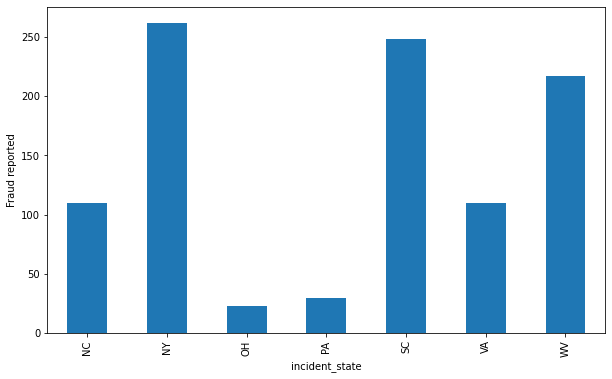

In [64]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


In NY state,most numbers of fraud reported.

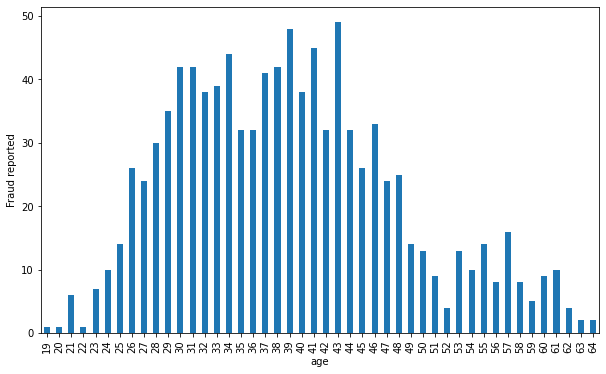

In [65]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('age').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


Most number of fraud reported between age 26-48.

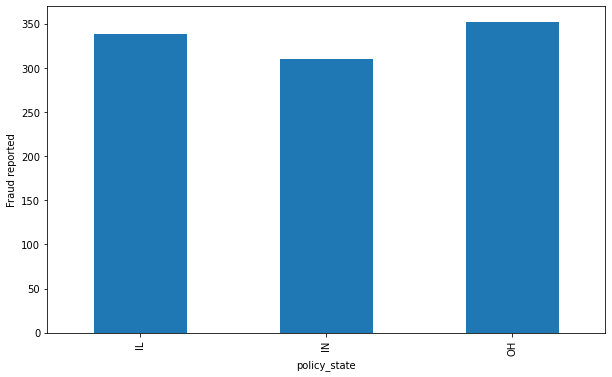

In [66]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


 For Policy state OH ,most number of fraud reported.

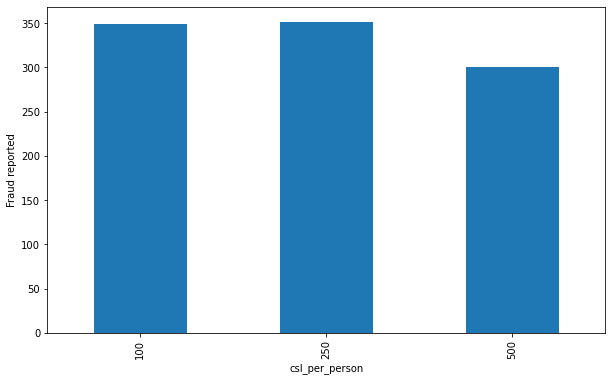

In [67]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('csl_per_person').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For csl per person 250, most number of fraud reported.

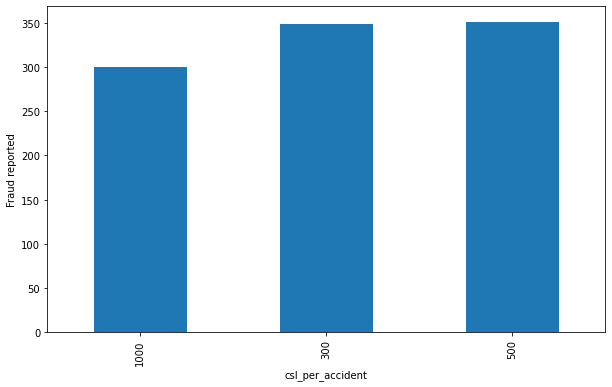

In [68]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('csl_per_accident').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For csl per accident 500, most number of fraud reported.

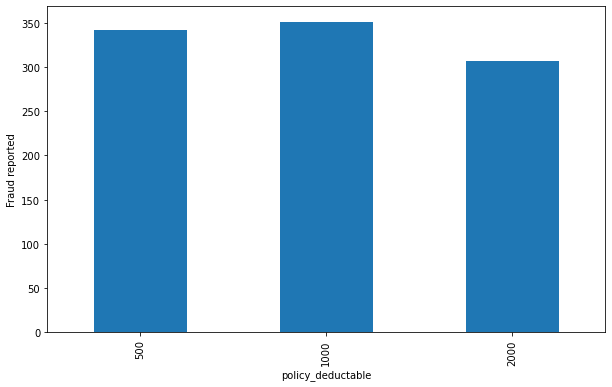

In [70]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_deductable').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For policy_deductable 1000,most number of fraud reported. 

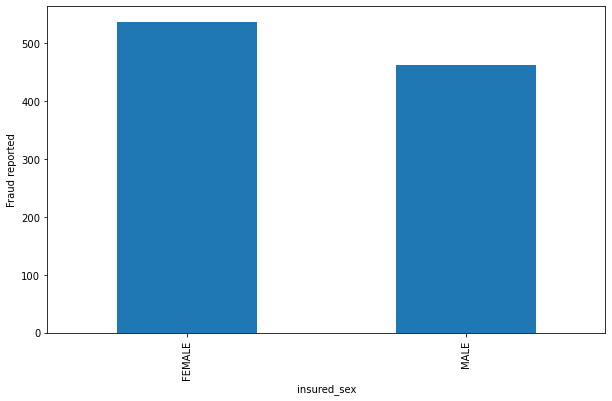

In [71]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_sex').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For insured_sex  FEMALE, most number of fraud reported. 

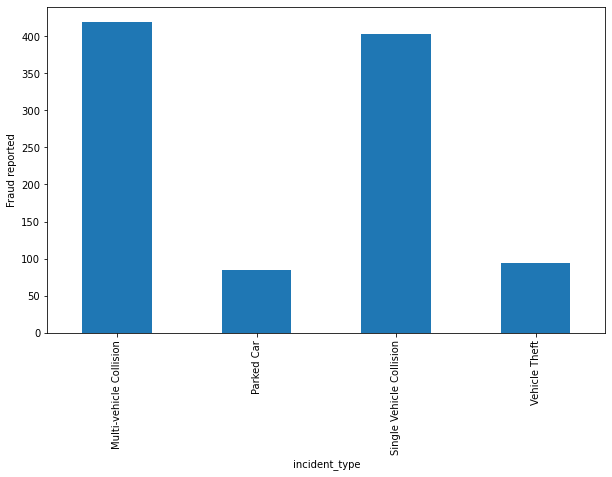

In [72]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For incident_type Multi-vehicle Collision,most number of fraud reported.

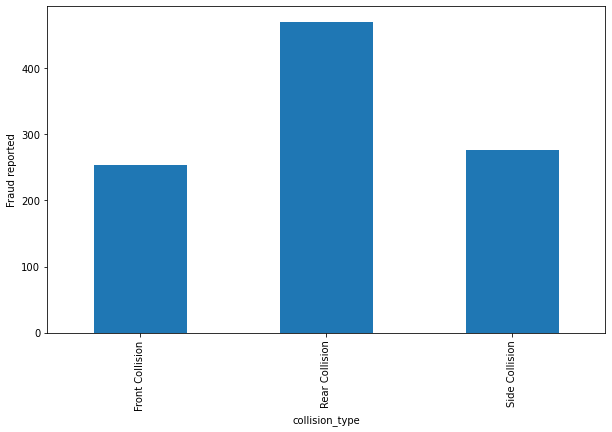

In [73]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('collision_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For collision_type Rear Collision,most number of fraud reported.

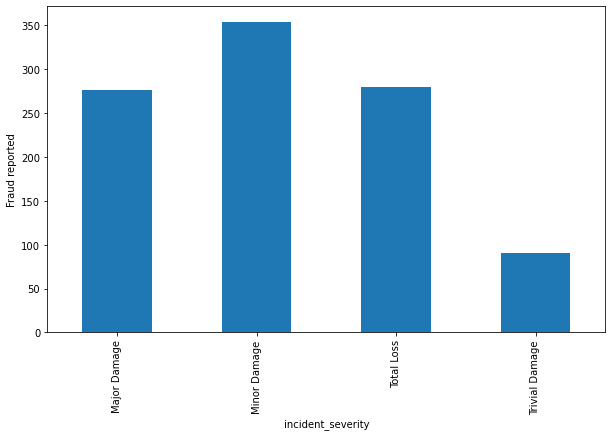

In [74]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_severity').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For incident_severity Mirror Damage,most number of fraud reported.

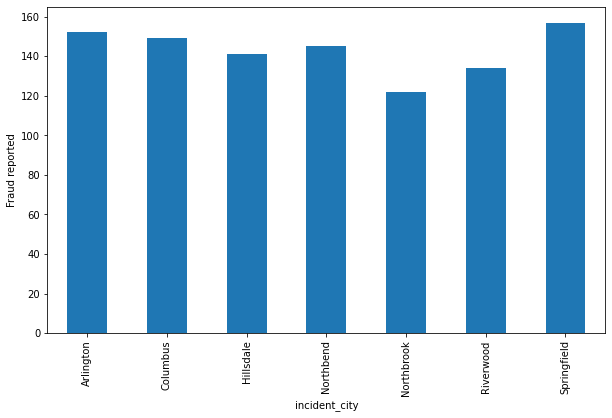

In [75]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_city').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For incident_city Springfield,most number of fraud reported.

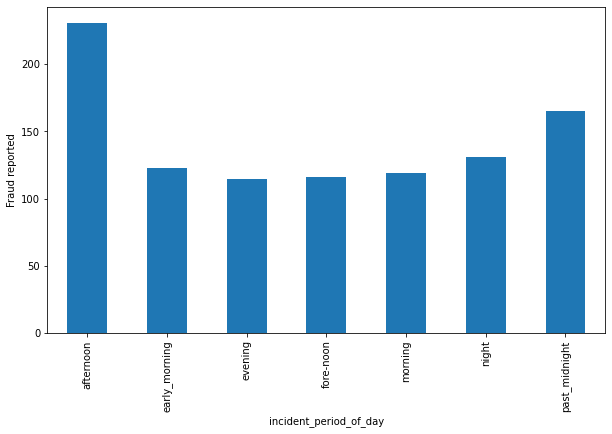

In [77]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_period_of_day').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


In [ ]:
Most of fraud reported in afternoon.

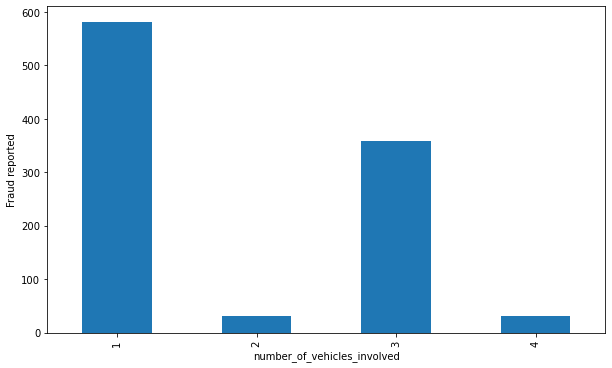

In [78]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('number_of_vehicles_involved').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


Most no of Fraud reported for single vehicles.

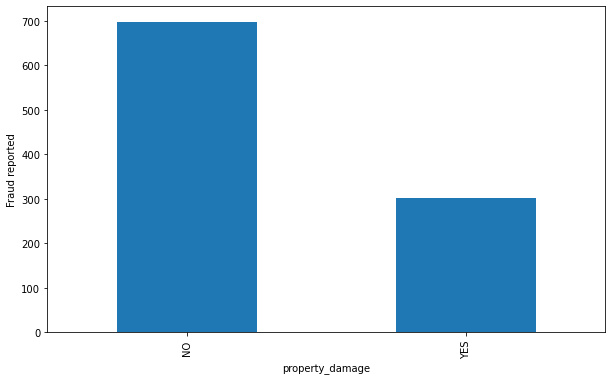

In [80]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('property_damage').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


No property damage in most no of fraud report.

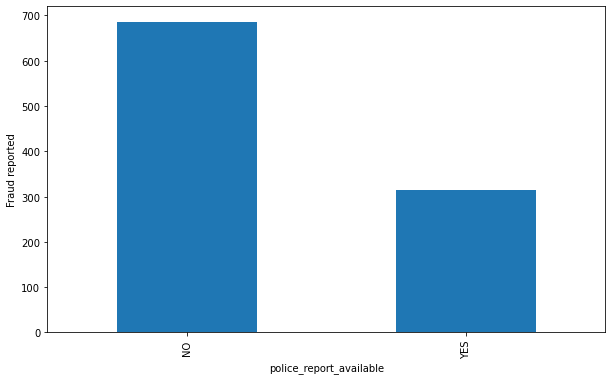

In [81]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('police_report_available').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


Most of the fraud reported,police report not available.

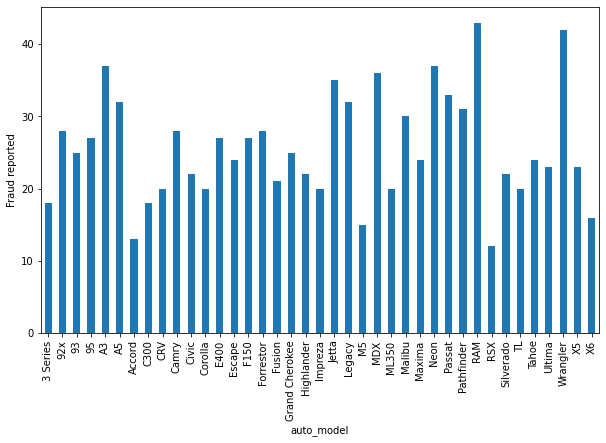

In [82]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('auto_model').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


For Pathfinder and Wrangler auto model,most number of fraud reported.

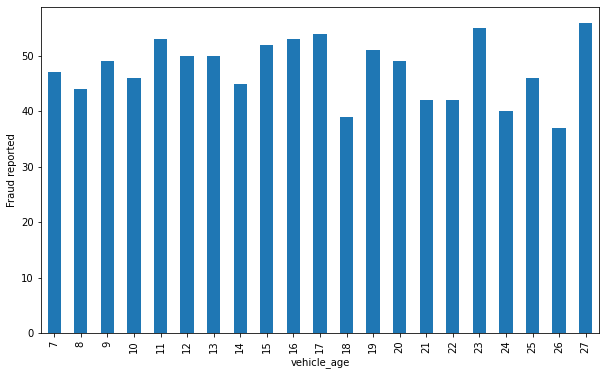

In [83]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('vehicle_age').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


Most no of fraud reported for oldest vehicle.

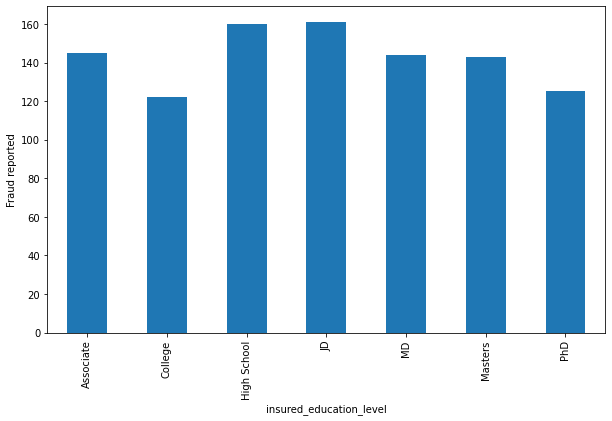

In [85]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_education_level').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()


 For Education level Highschool,Most number of Fraud reported.

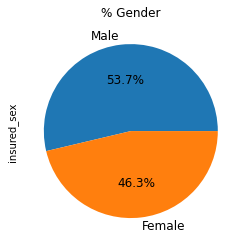

In [86]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()


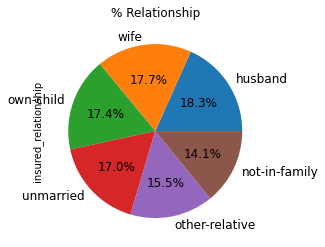

In [87]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()


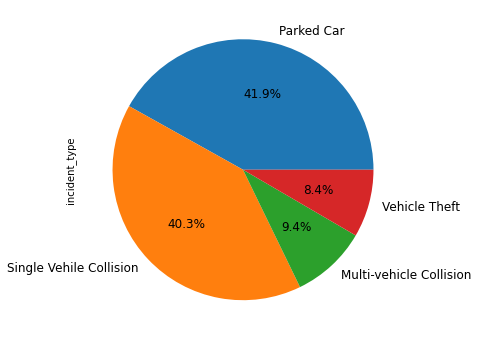

In [88]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 


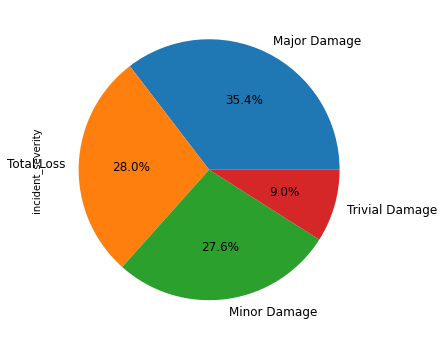

In [89]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  


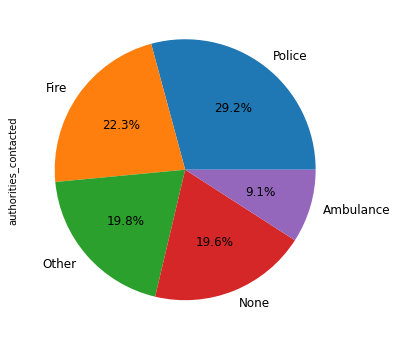

In [90]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 


# Bi-variate Analysis

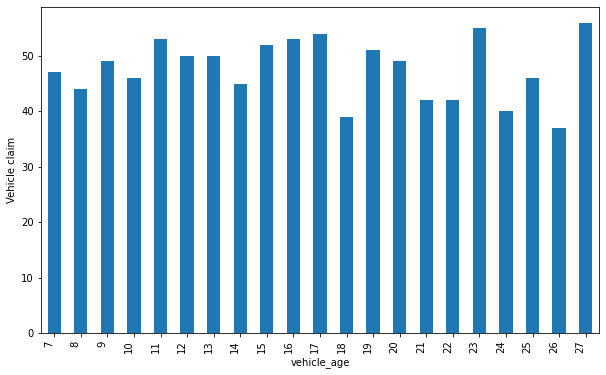

In [92]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('vehicle_age').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


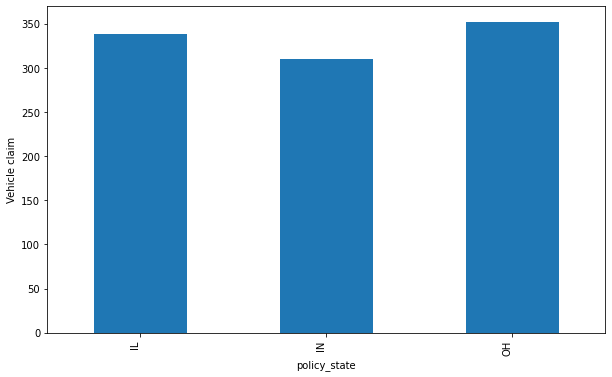

In [93]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('policy_state').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


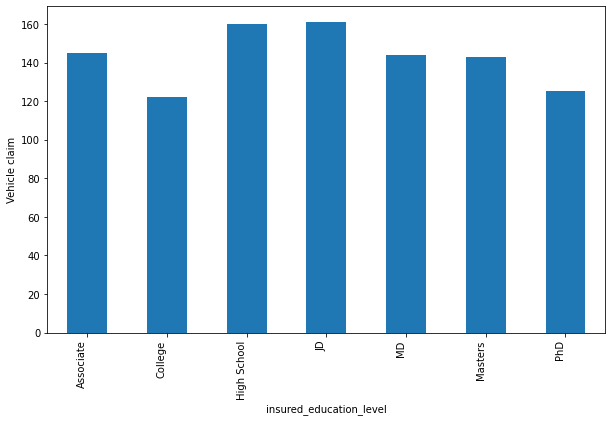

In [95]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_education_level').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


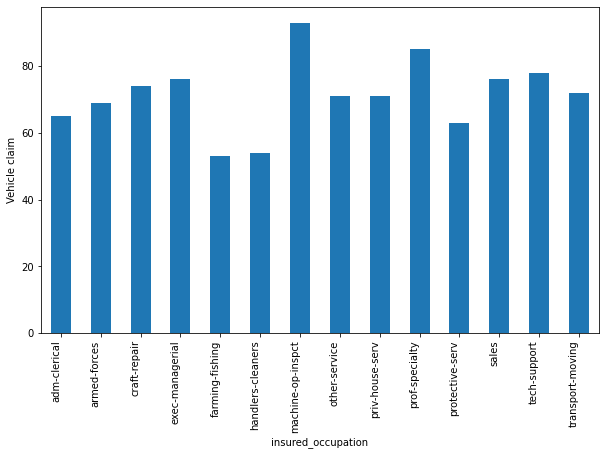

In [96]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_occupation').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


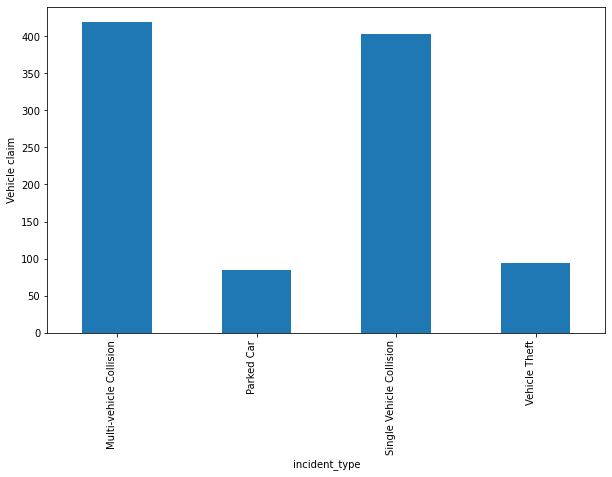

In [97]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('incident_type').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


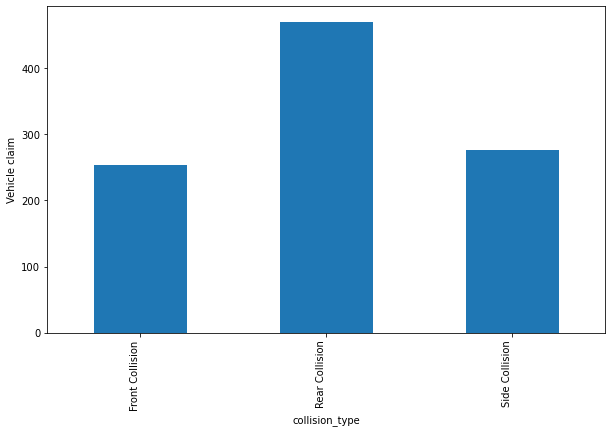

In [98]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


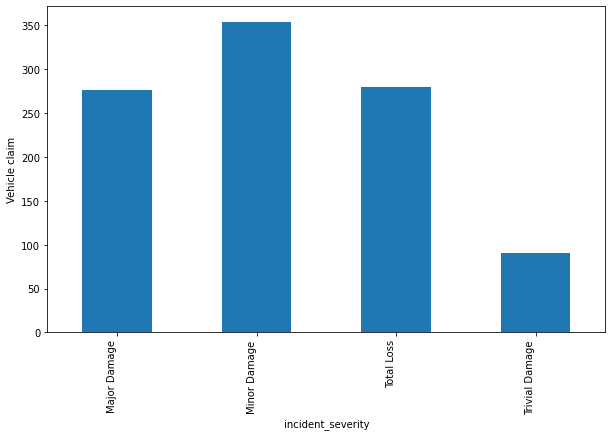

In [99]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('incident_severity').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


# Multivariate Analysis

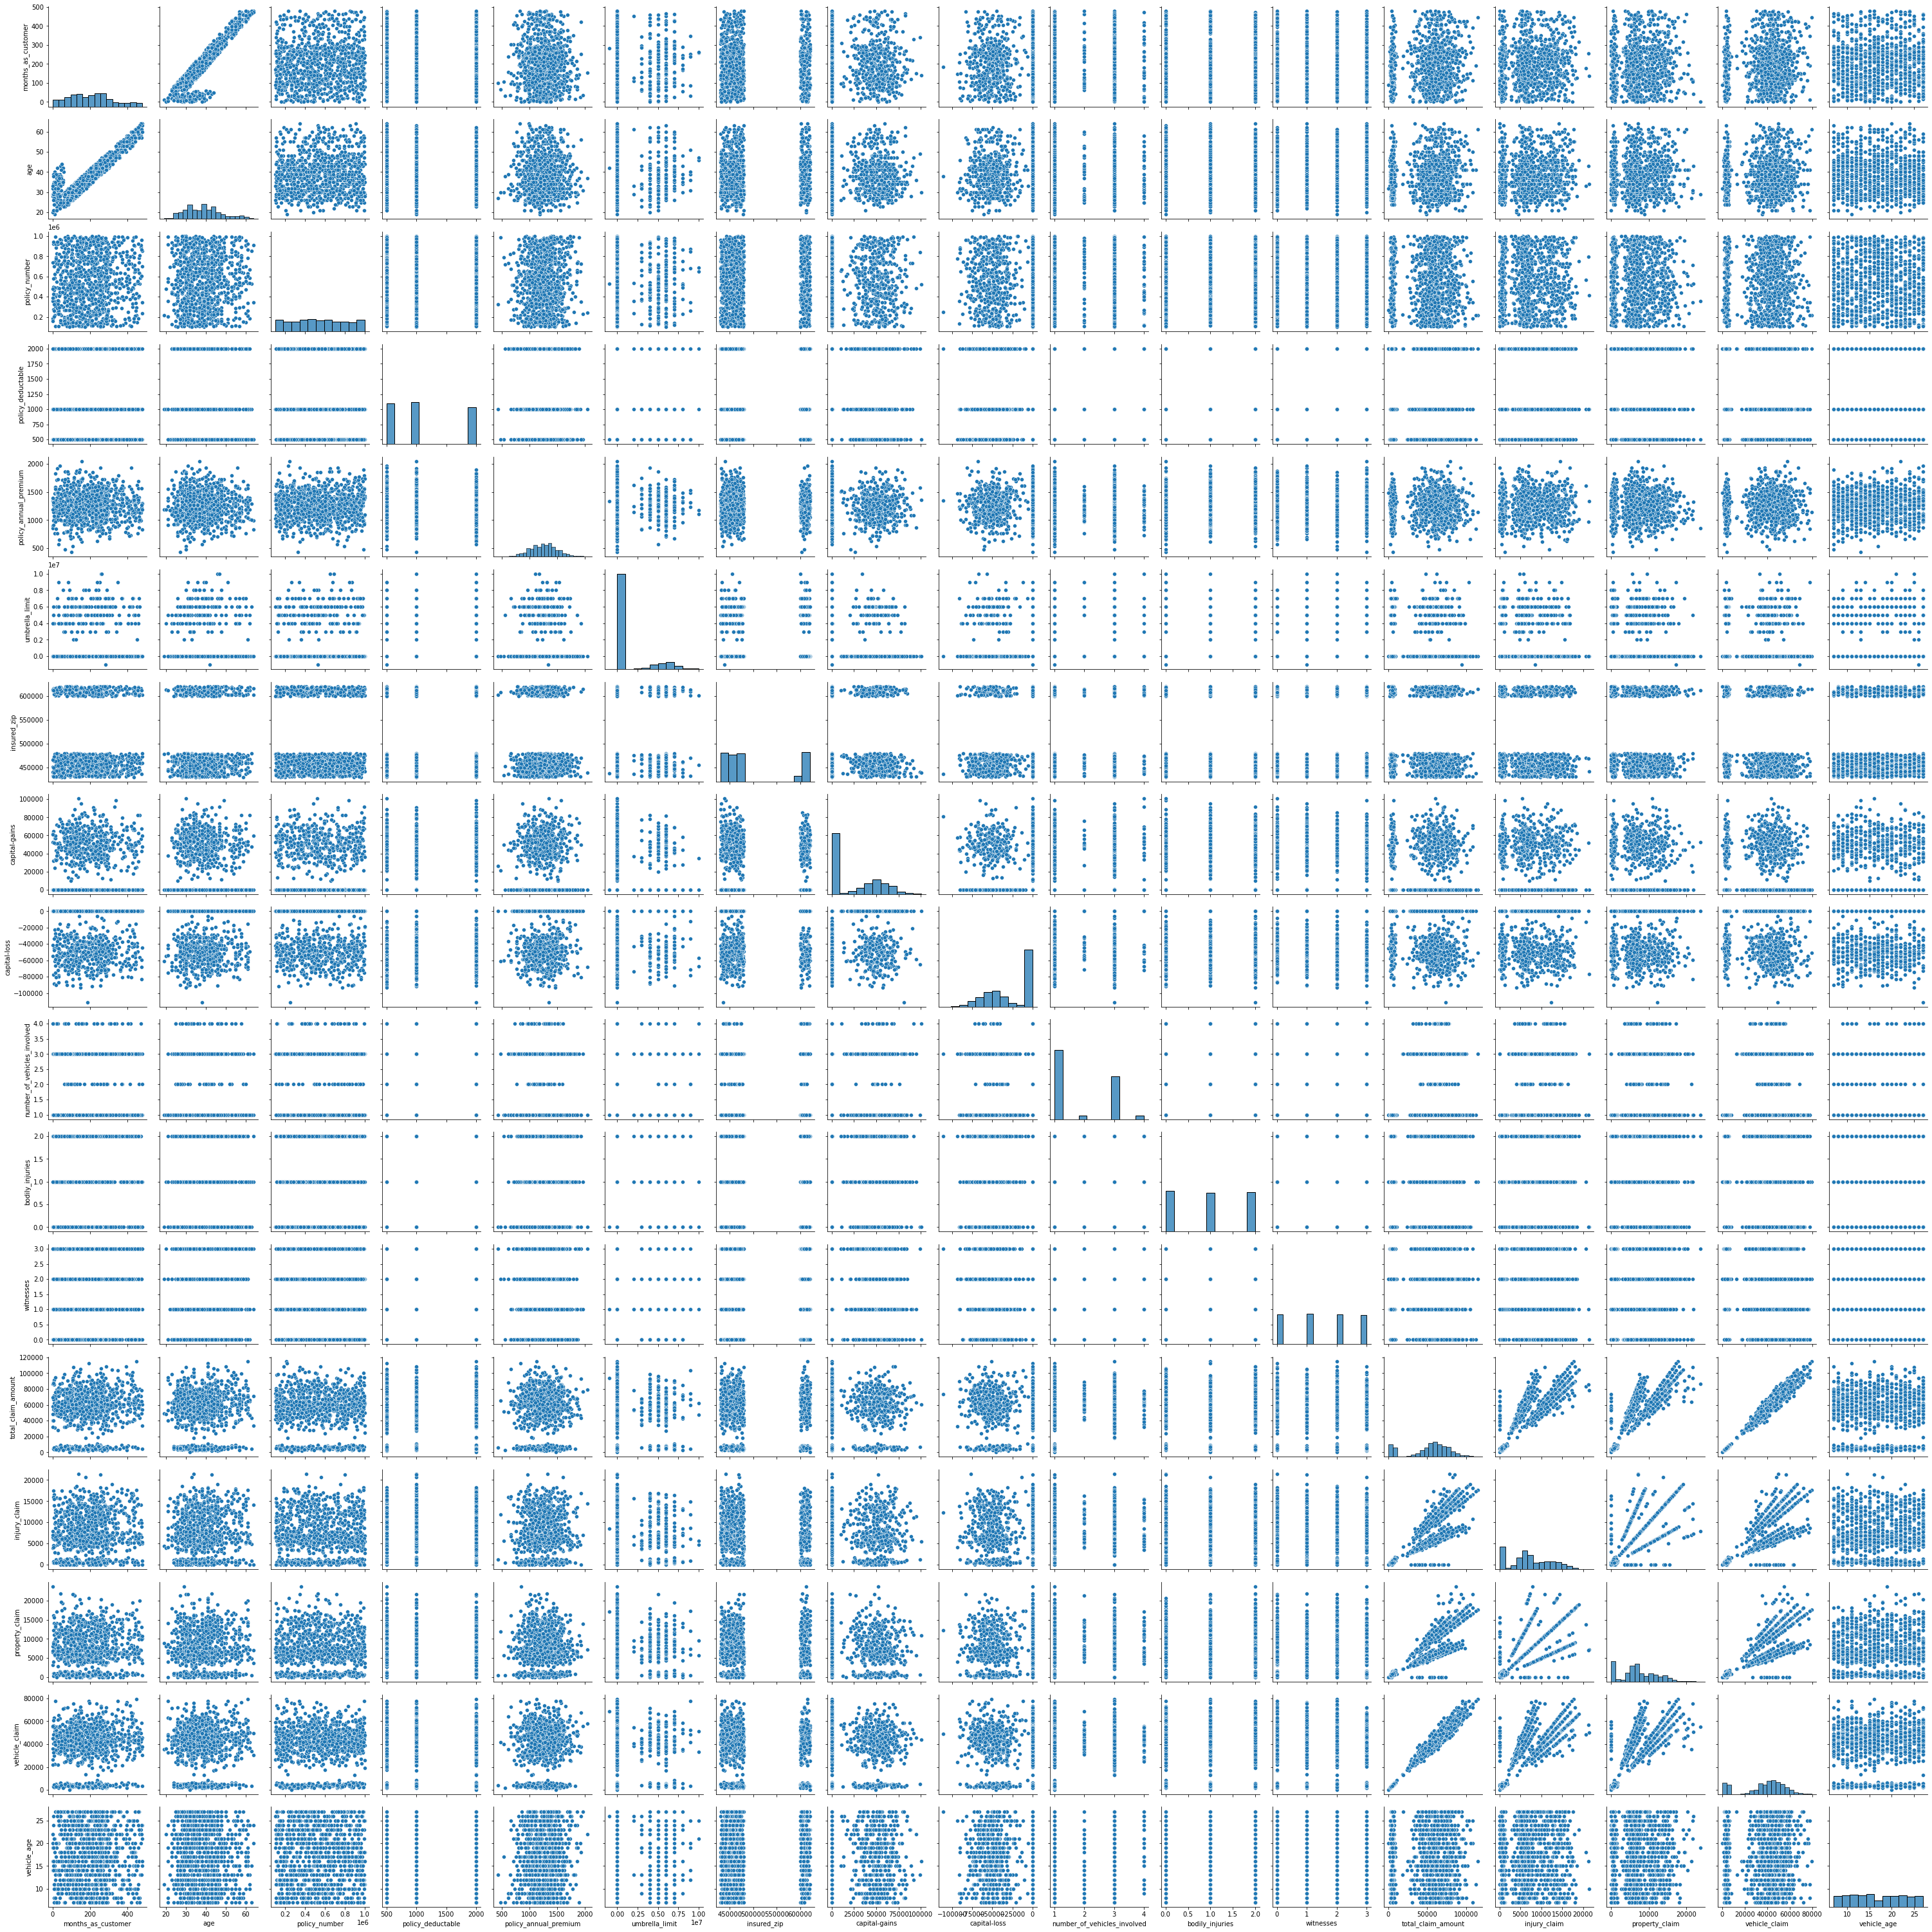

In [100]:
sns.pairplot(df)

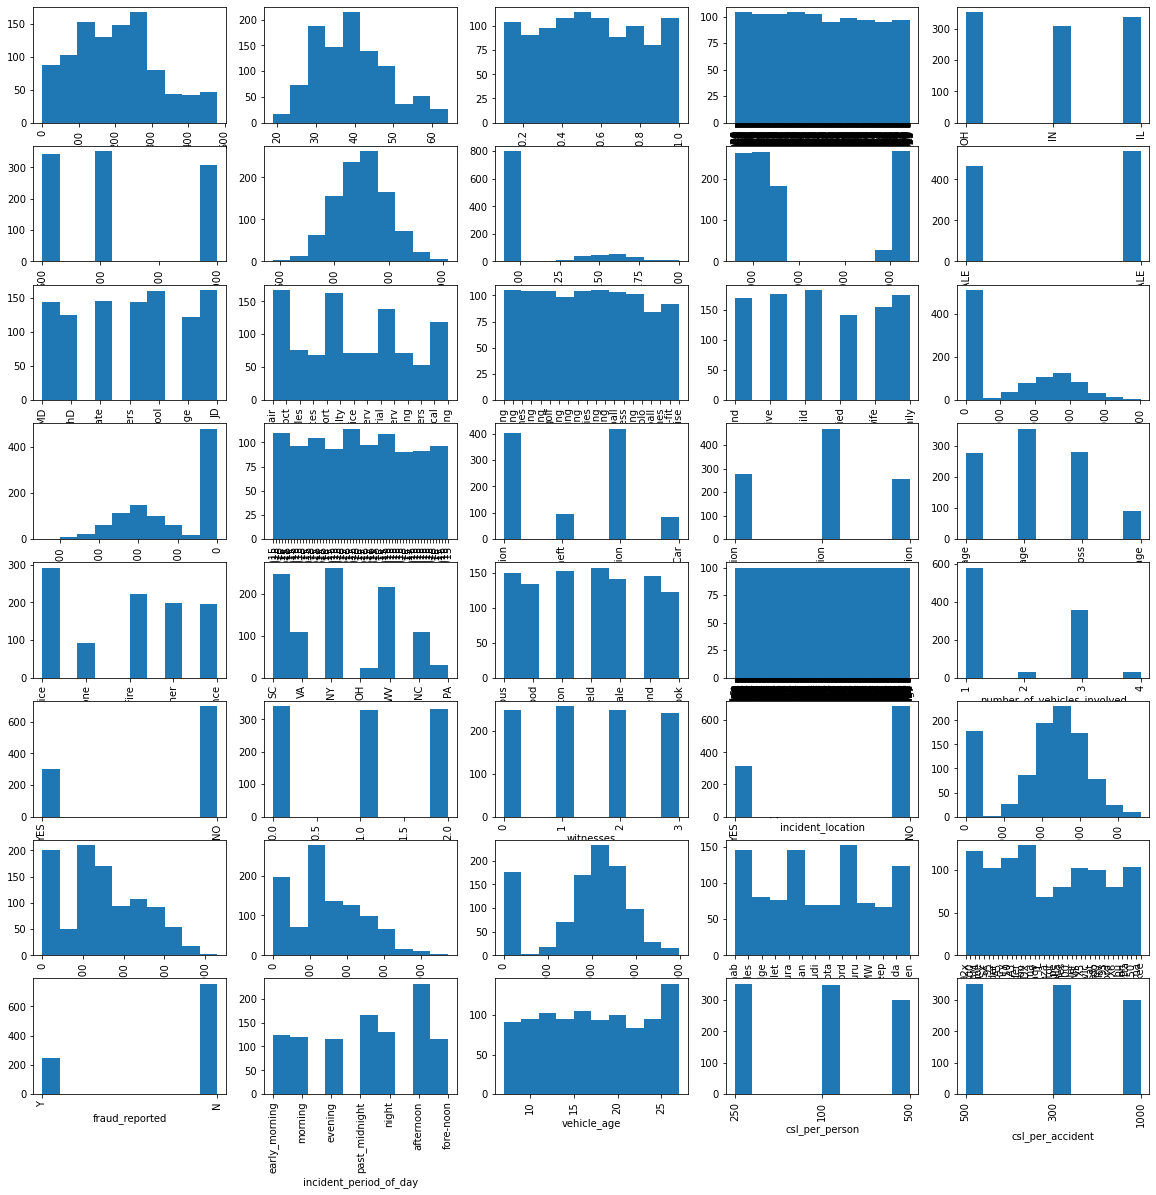

In [101]:
plt.figure(figsize = (20,20))
graph=1

for i in df.columns:
    if graph <=40:
        ax=plt.subplot(8,5,graph)
        plt.hist(df[i])
        plt.xlabel(i)
        plt.xticks(rotation=90)
        graph +=1
plt.show()

# Outliers

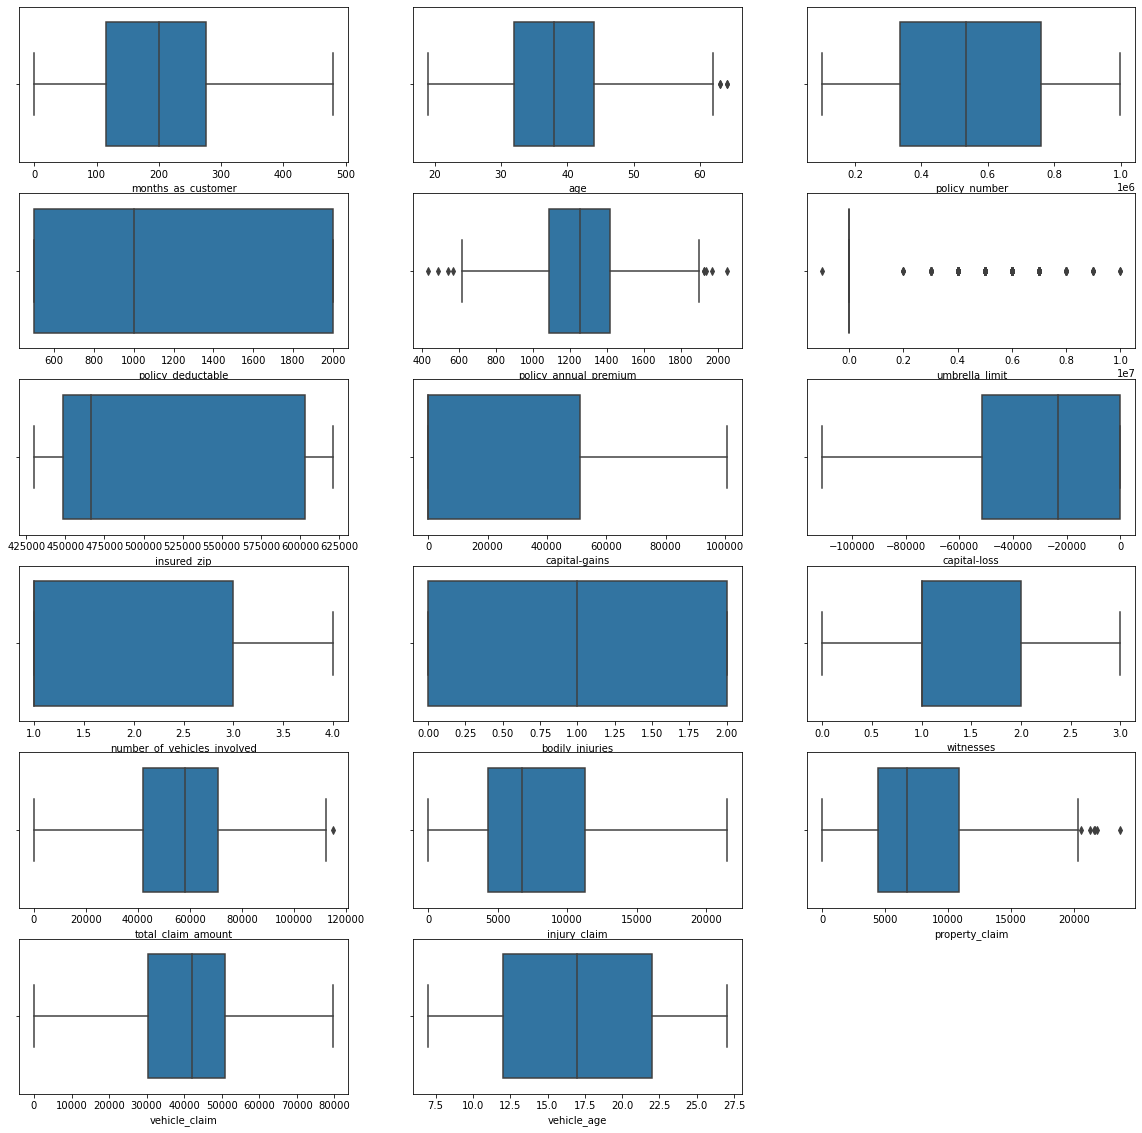

In [105]:
columns =['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'vehicle_age']
plt.figure(figsize =(20,20))
graph =1
for i in columns:
    
    if graph <=18:
        ax=plt.subplot(6,3,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph +=1 
plt.show()


age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim columns are showing outliers.

# ZScore

In [125]:
column = df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']]
from scipy.stats import zscore
z=np.abs(zscore(column))
z



array([[0.99083647, 0.61670461, 0.47947582, 0.71425742, 1.16550497],
       [0.33407345, 0.24252118, 1.69798022, 1.80731185, 1.37269599],
       [1.08891308, 0.64223266, 1.69798022, 0.68636176, 0.73607206],
       ...,
       [0.54161057, 0.52073881, 0.8269978 , 0.55850675, 0.0208261 ],
       [2.52328351, 0.41186558, 1.69798022, 0.21910974, 0.45197603],
       [2.3043625 , 2.00870981, 0.47947582, 1.80769081, 1.34366428]])

In [107]:
## Following indexes have outliers:

threshold = 3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [126]:
df_new =df[(z<3).all(axis=1)]
df_new

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft   Rear Collision   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft   Rear Collision   
..   

In [109]:
data_loss =((1000-981)/1000)*100

In [110]:
data_loss

1.9

In [112]:
df_new.shape

(981, 40)

# Skewness

In [111]:
df_new.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
capital-gains                  0.465985
capital-loss                  -0.390468
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
vehicle_age                    0.054033
csl_per_person                 0.419579
csl_per_accident               0.615942
dtype: float64

umbrella_limit,insured_zip,total_claim_amount,vehicle_claim,csl_per_accident are showing skewnwss.

In [ ]:
umbrella_limit and csl_per_accident have  discrete values ,so will not remove skewness in these columns.

In [130]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["insured_zip","total_claim_amount","vehicle_claim"]
scaler = PowerTransformer(method='yeo-johnson')


In [132]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()


insured_zip  total_claim_amount  vehicle_claim
0          0.0            0.691077       0.740346
1          0.0           -1.590743      -1.593594
2          0.0           -0.796814      -0.884955
3          0.0            0.293187       0.642318
4          0.0           -1.558383      -1.562066

In [133]:
# Again checking skewness:
df_new.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.000000
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount             0.052059
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                  0.049597
auto_year                     -0.054033
vehicle_age                    0.054033
csl_per_person                 0.419579
csl_per_accident               0.615942
dtype: float64

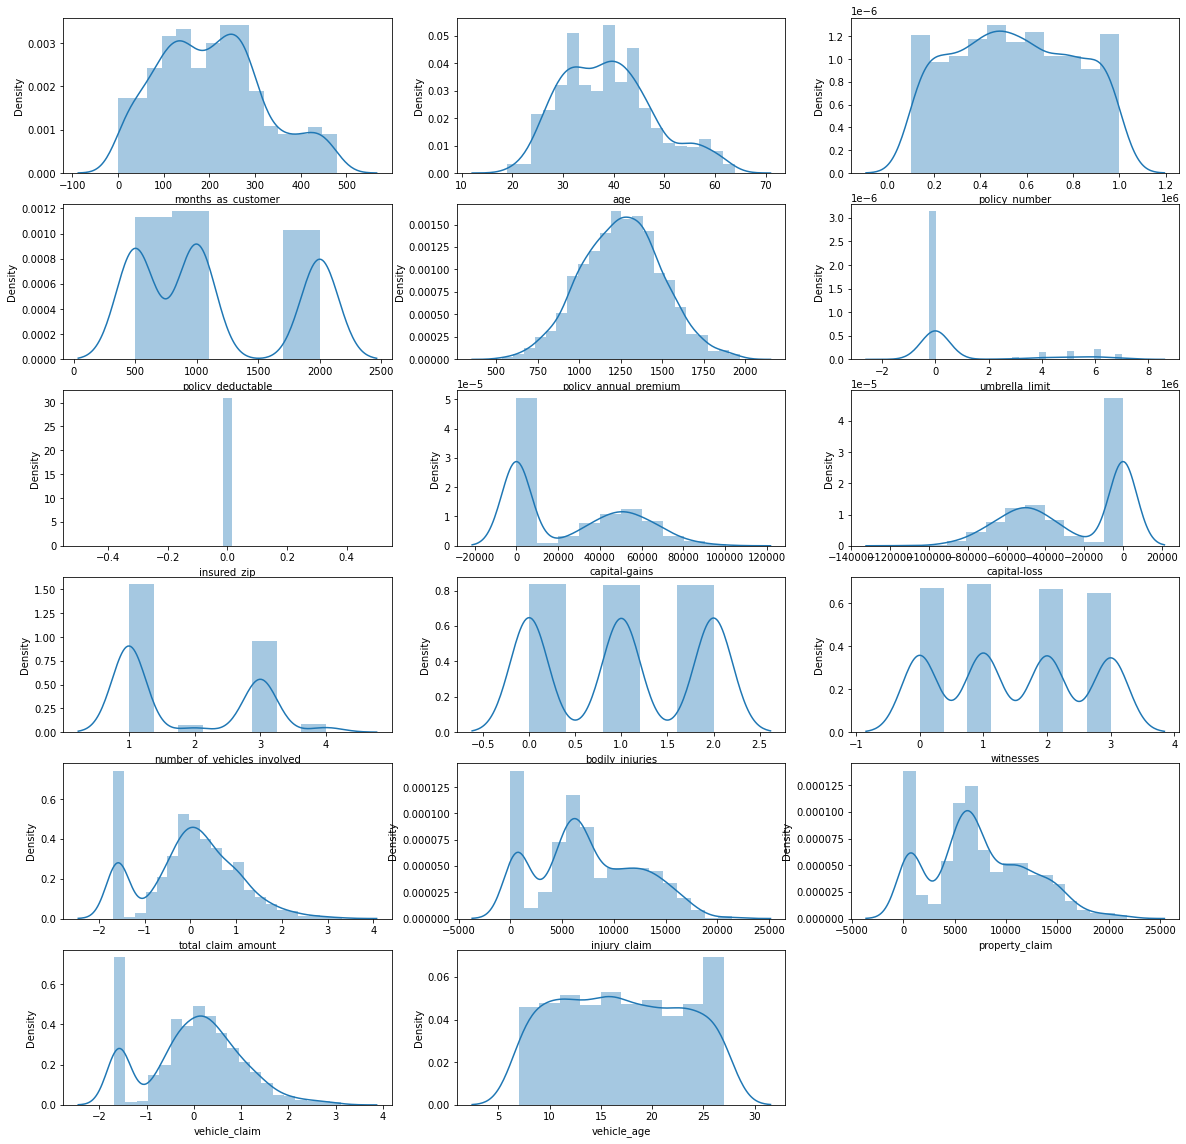

In [134]:
columns =['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'vehicle_age']

plt.figure(figsize = (20,20))
graph=1
for i in columns:
    if graph <=18:
        ax =plt.subplot(6,3,graph)
        sns.distplot(df_new[i])
        plt.xlabel(i)
        graph +=1
plt.show()

# Label Encoder

In [142]:
col= ['policy_bind_date', 'policy_state', 'csl_per_person','csl_per_accident', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location','incident_period_of_day',
       'property_damage', 'police_report_available', 'vehicle_age', 'auto_make','auto_model',
       'fraud_reported']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[col]= df_new[col].apply(le.fit_transform)


In [143]:
df_new.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 328   48         521585               522             2   
1                 228   42         342868               805             1   
2                 134   29         687698               185             2   
3                 256   41         227811               750             0   
4                 228   44         367455               180             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  insured_education_level  insured_occupation  \
0          0.0            1                        4                   2   
1          0.0            1                        4                   6   
2          0.0            0                        6                  11   
3          0.0            0                        6                   1   
4          0.0            1                        0                  11   

   insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17                     0          53300             0   
1               15                     2              0             0   
2                2                     3          35100             0   
3                2                     4          48900        -62400   
4                2                     4          66000        -46000   

   incident_date  incident_type  collision_type  incident_severity  \
0             49              2               2                  0   
1             41              3               1                  1   
2             44              0               1                  1   
3             19              2               0                  0   
4             34              3               1                  1   

   authorities_contacted  incident_state  incident_city  incident_location  \
0                      4               4              1                977   
1                      4               5              5                616   
2                      4               1              1                671   
3                      4               2              0                656   
4                      2               1              0                214   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                1   
1                         8                            1                0   
2                         7                            3                0   
3                         5                            1                0   
4                        20                            1                0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        1            0.691077   
1                0          0                        0           -1.590743   
2                2          3                        0           -0.796814   
3                1          2                        0            0.293187   
4                0          1                        0           -1.558383   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020       0.740346         10           1   
1           780             780      -1.593594          8          12   
2          7700            3850      -0.884955          4          30   
3          6340            6340       0.642318          3          34   
4          1

# Correlation

In [144]:
df_new.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922960       0.061414   
age                                    0.922960  1.000000       0.062414   
policy_number                          0.061414  0.062414       1.000000   
policy_bind_date                       0.054977  0.056760       0.052808   
policy_state                          -0.007179 -0.020009       0.071324   
policy_deductable                      0.030777  0.031851      -0.011445   
policy_annual_premium                 -0.003875  0.005290       0.028229   
umbrella_limit                         0.018288  0.013305       0.000402   
insured_zip                                 NaN       NaN            NaN   
insured_sex                            0.059770  0.073857       0.008152   
insured_education_level               -0.000735  0.001645      -0.033769   
insured_occupation                     0.006786  0.014703      -0.015437   
insured_hobbies                       -0.089267 -0.079038       0.032426   
insured_relationship                   0.071304  0.075993       0.020254   
capital-gains                          0.007126 -0.004735       0.011266   
capital-loss                           0.023429  0.013125      -0.002041   
incident_date                         -0.004124  0.000933       0.047075   
incident_type                         -0.016557 -0.026152       0.009136   
collision_type                        -0.073025 -0.076321       0.000321   
incident_severity                     -0.064059 -0.064373      -0.015811   
authorities_contacted                  0.013999  0.018575       0.022705   
incident_state                         0.015973  0.012750      -0.012807   
incident_city                         -0.006837 -0.006838      -0.027858   
incident_location                     -0.011575 -0.008765       0.017708   
incident_hour_of_the_day               0.066370  0.083785       0.000897   
number_of_vehicles_involved            0.011635  0.020254       0.006396   
property_damage                       -0.000521 -0.008165      -0.021233   
bodily_injuries                       -0.007870 -0.012377      -0.007666   
witnesses                              0.063289  0.056159      -0.007174   
police_report_available               -0.017084 -0.018058       0.025317   
total_claim_amount                     0.062912  0.071625      -0.020872   
injury_claim                           0.064864  0.077002      -0.007545   
property_claim                         0.036471  0.062231      -0.012333   
vehicle_claim                          0.058124  0.059014      -0.023540   
auto_make                              0.049912  0.033873       0.018083   
auto_model                             0.005350  0.015456       0.066096   
auto_year                              0.001145  0.005767      -0.003594   
fraud_reported                         0.021375  0.013338      -0.036190   
incident_period_of_day                -0.046905 -0.019270      -0.004684   
vehicle_age                           -0.001145 -0.005767       0.003594   
csl_per_person                        -0.021865 -0.013330       0.042022   
csl_per_accident                       0.006922  0.011123       0.045302   

                             policy_bind_date  policy_state  \
months_as_customer                   0.054977     -0.007179   
age                                  0.056760     -0.020009   
policy_number                        0.052808      0.071324   
policy_bind_date                     1.000000      0.015243   
policy_state                         0.015243      1.000000   
policy_deductable                    0.003576      0.017559   
policy_annual_premium               -0.040923      0.015079   
umbrella_limit                      -0.020965     -0.010908   
insured_zip                               NaN           NaN   
insured_sex                          0.044357     -0.017970   
insured_education_level              0.043991     -0.027173   
insu

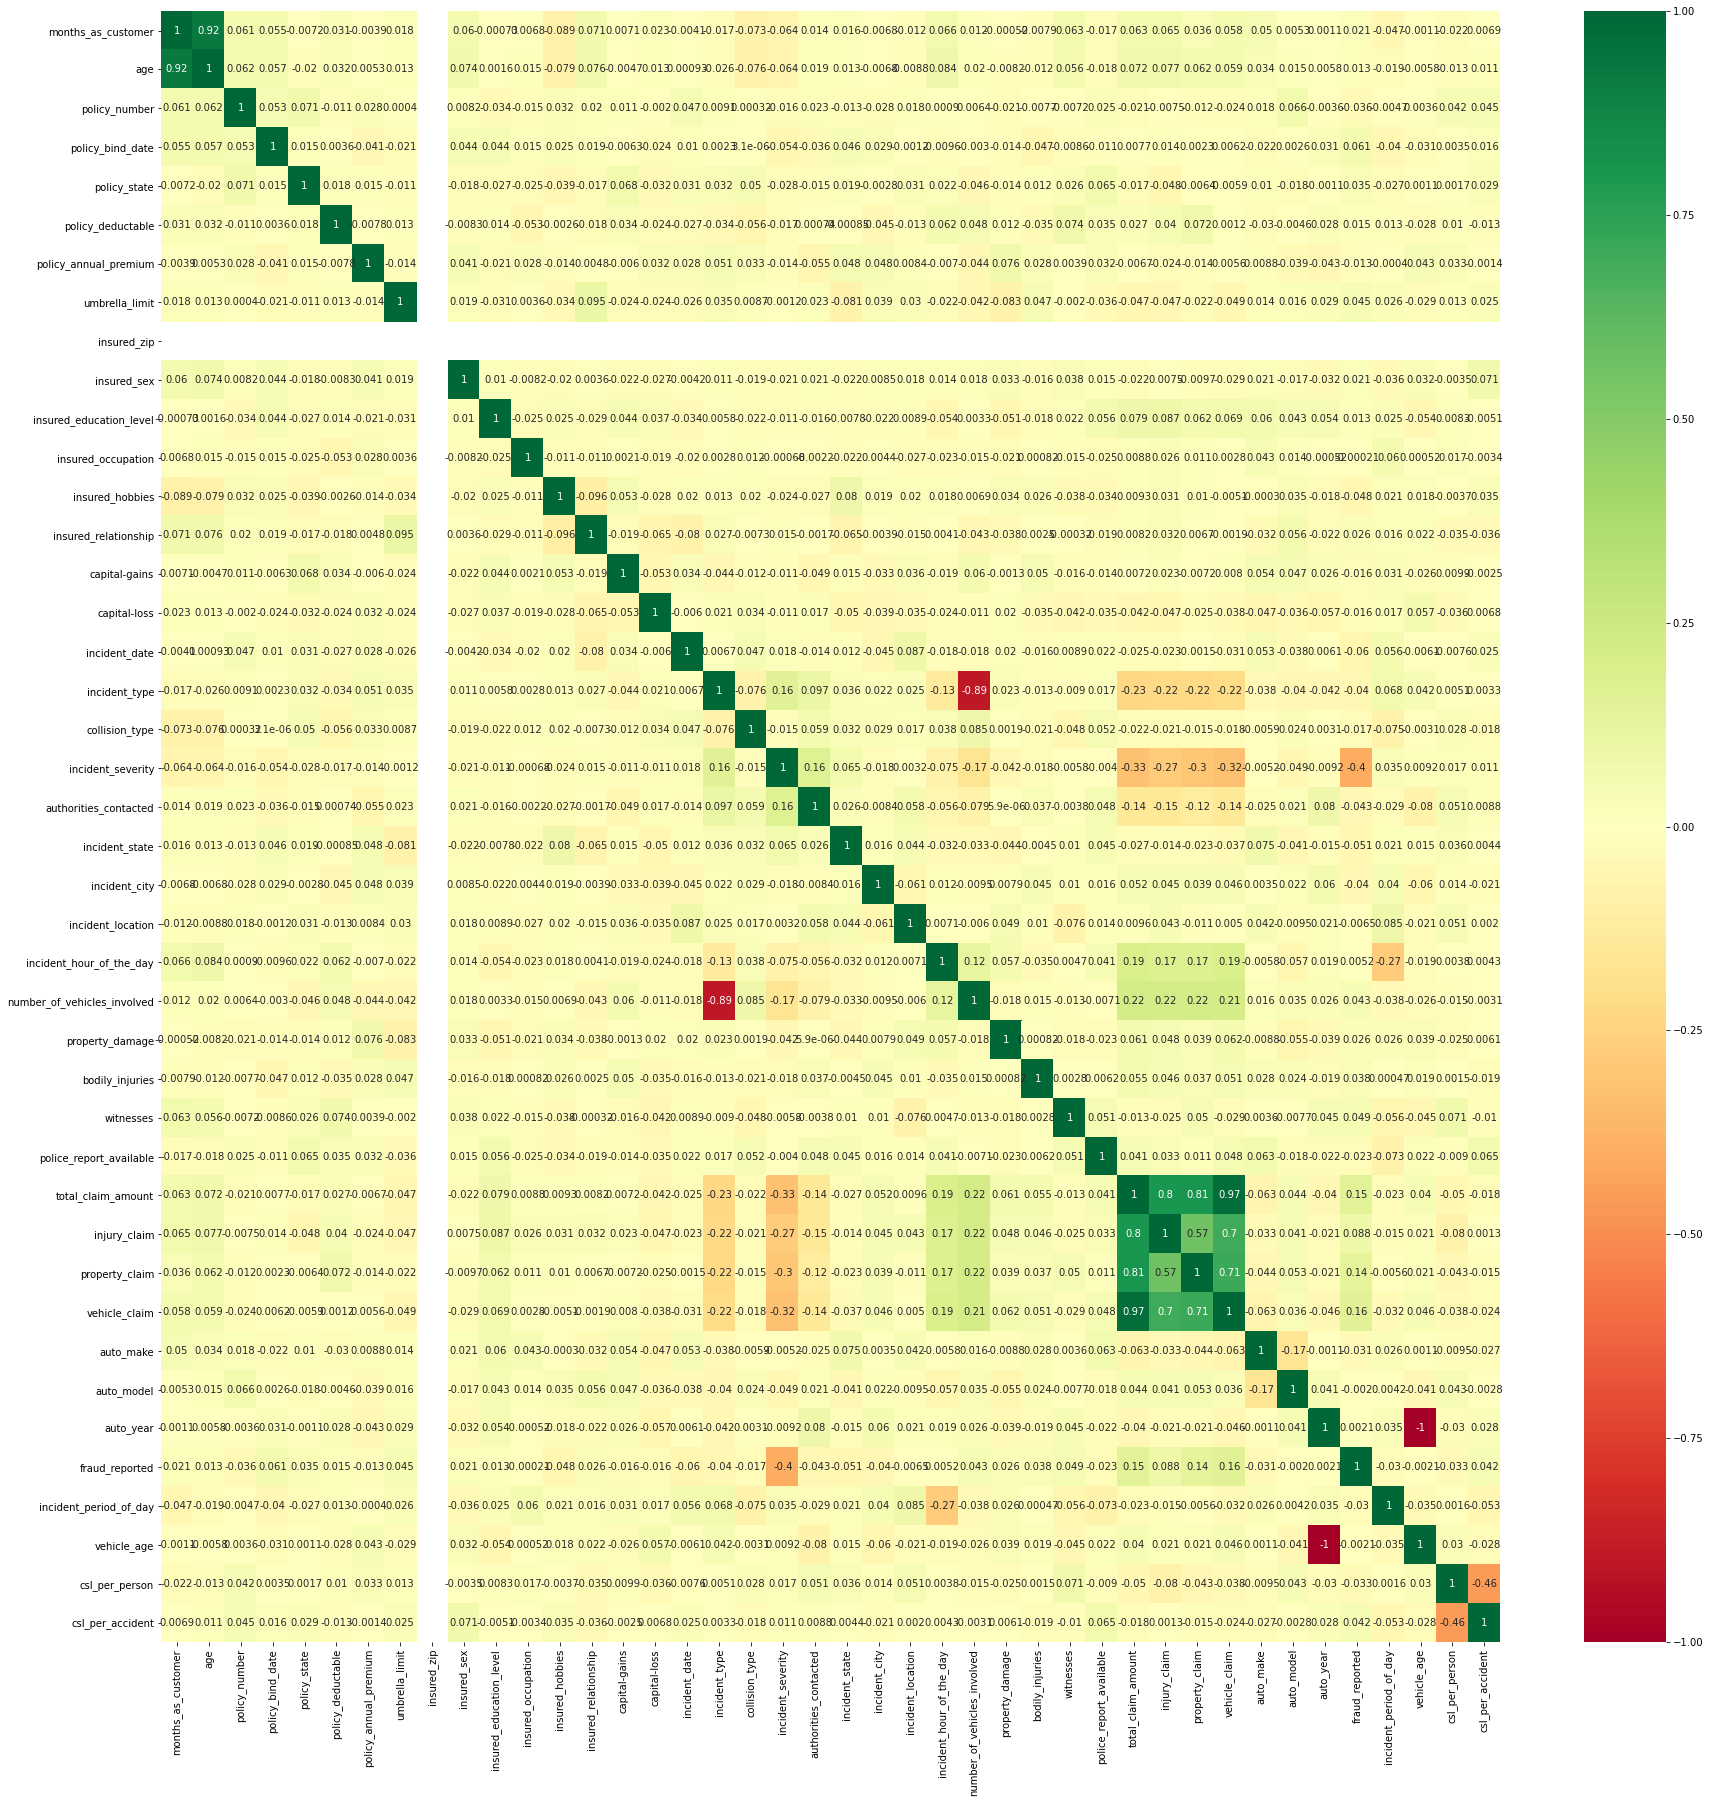

In [146]:
plt.figure(figsize = (30,30))
sns.heatmap(df_new.corr(),annot =True,cmap ='RdYlGn')
plt.show()

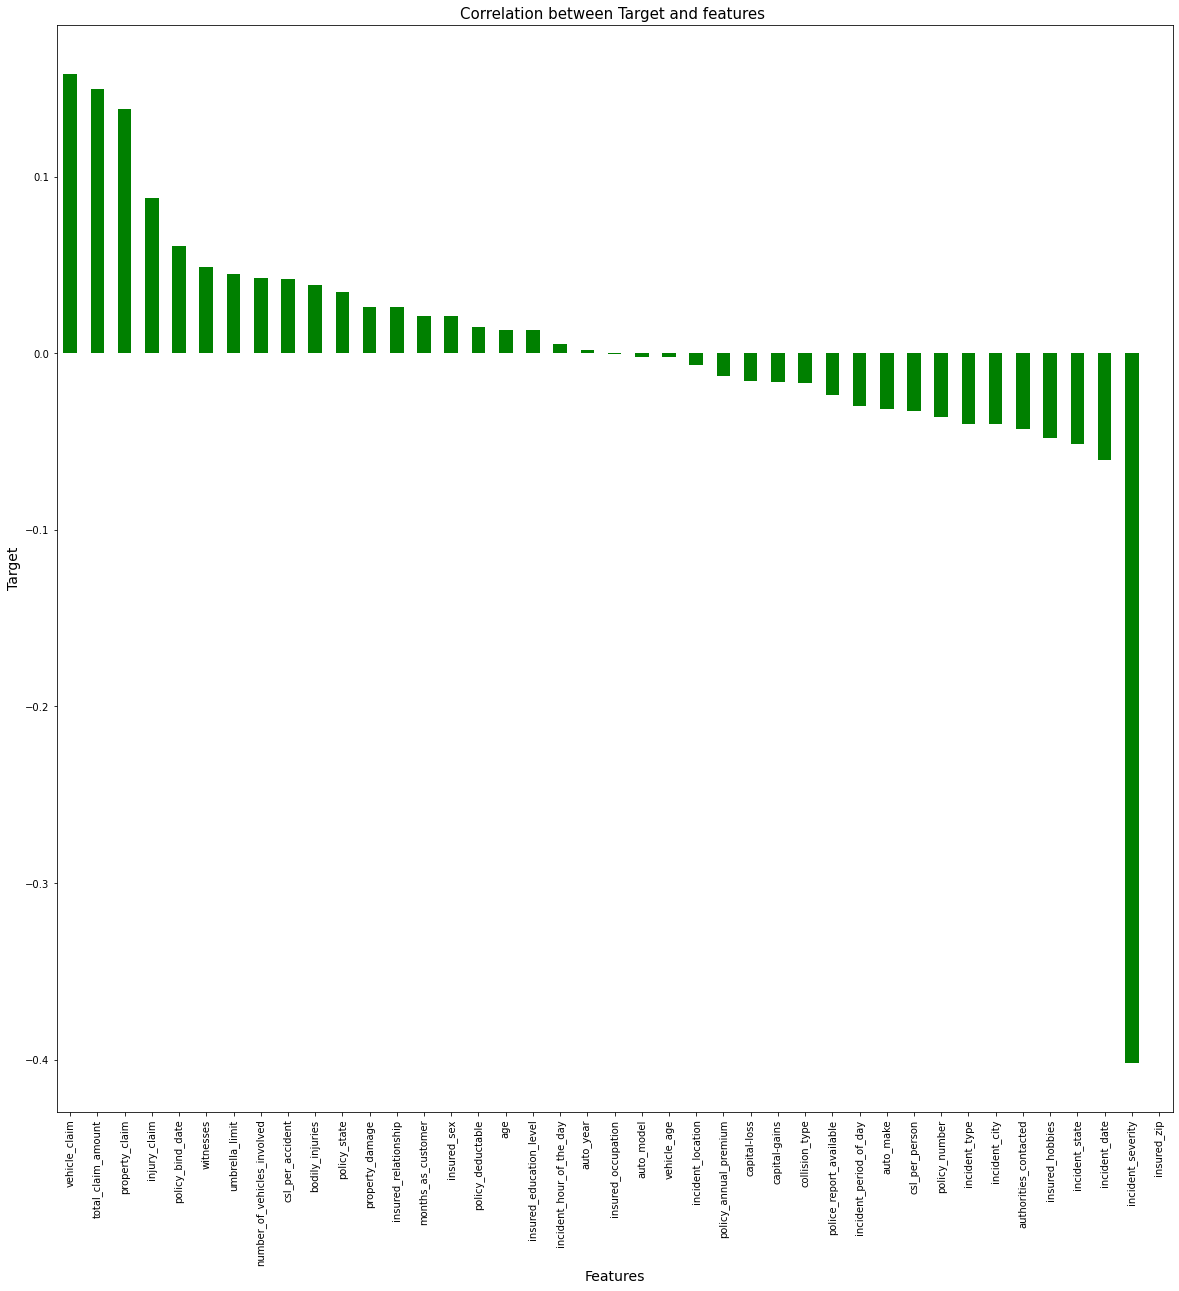

In [147]:
plt.figure(figsize=(20,20))
df_new.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


In [150]:
##Dropping unnecessary columns:-
df_new.drop(columns =['insured_zip','auto_year','incident_hour_of_the_day','policy_csl'],axis=1,inplace=True)

In [151]:
df_new.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'incident_period_of_day', 'vehicle_age',
       'csl_per_person', 'csl_per_accident'],
      dtype='object')

In [152]:
df_new.shape

(981, 39)

# Separating Features and Target :

In [153]:
x = df_new.drop('fraud_reported',axis=1)
y= df_new['fraud_reported']

In [154]:
x.shape,y.shape

((981, 38), (981,))

In [155]:
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

Data is not balanced in target column,So will balace it through oversampling.

In [156]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [157]:
y.value_counts()

0    741
1    741
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

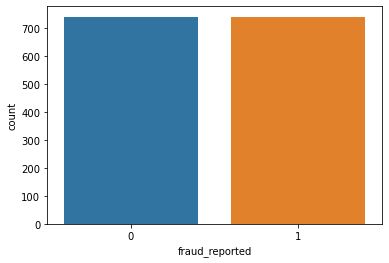

In [158]:
sns.countplot(y)

# Standard Scaler


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_number  policy_bind_date  \
0               1.091885  1.018433      -0.067450          0.198295   
1               0.193648  0.344480      -0.775024          1.301905   
2              -0.650694 -1.115752       0.590222         -1.115899   
3               0.445154  0.232155      -1.230556          1.087423   
4               0.193648  0.569131      -0.677680         -1.135398   
...                  ...       ...            ...               ...   
1477            1.505074  1.467735       1.081608         -1.353780   
1478            0.714625  1.018433       1.424993         -1.252388   
1479           -0.983042 -1.003426      -0.642827         -1.462971   
1480            0.741573  0.681457       0.650956         -1.279686   
1481           -1.692649 -2.126681      -1.274155         -1.193893   

      policy_state  policy_deductable  policy_annual_premium  umbrella_limit  \
0         1.363193          -0.247062               0.626274       -0.515969   
1         0.098164           1.499483              -0.283528        1.712892   
2         1.363193           1.499483               0.653305        1.712892   
3        -1.166866           1.499483               0.664586        2.158664   
4        -1.166866          -0.247062               1.394241        2.158664   
...            ...                ...                    ...             ...   
1477      0.098164           1.305616               0.205900       -0.515969   
1478     -1.166866          -0.570172               0.541527       -0.515969   
1479      0.098164           1.499483               0.775467        2.158664   
1480     -1.166866           1.188598              -0.959596       -0.515969   
1481     -1.166866          -0.247062              -0.286679       -0.515969   

      insured_sex  insured_education_level  insured_occupation  \
0        1.263110                 0.649951           -1.172148   
1        1.263110                 0.649951           -0.124584   
2       -0.791697                 1.745774            1.184871   
3       -0.791697                 1.745774           -1.434039   
4        1.263110                -1.541693            1.184871   
...           ...                      ...                 ...   
1477    -0.791697                 0.102040           -0.910257   
1478     1.263110                -0.445871            0.137307   
1479    -0.791697                 0.102040           -1.434039   
1480    -0.791697                -1.541693           -0.124584   
1481    -0.791697                 0.102040           -1.172148   

      insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0            1.408668             -1.487117       1.062851      1.015906   
1            1.038091             -0.205030      -0.899405      1.015906   
2           -1.370660              0.436013       0.392812      1.015906   
3           -1.370660              1.077057       0.900864     -1.275189   
4           -1.370660              1.077057       1.530406     -0.673042   
...               ...                   ...            ...           ...   
1477         0.852803              1.718100       1.421285     -0.759729   
1478         0.667514              1.718100       0.694624     -0.347148   
1479        -0.629506              0.436013       0.492656      0.274935   
1480         0.482225             -0.846073       0.632701      1.015906   
1481         1.593957              1.077057      -0.899405     -1.177817   

      incident_date  incident_type  collision_type  incident_severity  \
0          1.237916       0.939332        1.551034          -0.961784   
1          0.746809       1.925232        0.140830           0.118856   
2          0.930974      -1.032467        0.140830           0.118856   
3         -0.603735       0.939332       -1.269374          -0.961784   
4          0.317090       1.925232        0.140830           0.118856   
...             ...            ...             .

# Checking for Multicollinearity Problem using VIF:- 

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


VIF values                     Features
0     7.813349           months_as_customer
1     7.778427                          age
2     1.059197                policy_number
3     1.041627             policy_bind_date
4     1.058508                 policy_state
5     1.054197            policy_deductable
6     1.045359        policy_annual_premium
7     1.076435               umbrella_limit
8     1.074606                  insured_sex
9     1.048700      insured_education_level
10    1.044352           insured_occupation
11    1.073212              insured_hobbies
12    1.060244         insured_relationship
13    1.047707                capital-gains
14    1.055072                 capital-loss
15    1.057556                incident_date
16    3.682989                incident_type
17    1.100142               collision_type
18    1.335556            incident_severity
19    1.131652        authorities_contacted
20    1.067803               incident_state
21    1.070732                incident_city
22    1.051320            incident_location
23    3.602930  number_of_vehicles_involved
24    1.065344              property_damage
25    1.044226              bodily_injuries
26    1.068941                    witnesses
27    1.089396      police_report_available
28  297.939678           total_claim_amount
29   16.379076                 injury_claim
30   17.082626               property_claim
31  137.082541                vehicle_claim
32    1.088478                    auto_make
33    1.090086                   auto_model
34    1.085286       incident_period_of_day
35    1.061591                  vehicle_age
36    1.236743               csl_per_person
37    1.192107             csl_per_accident

total_claim_amout has  hjghest vif value,so drop this column.

In [162]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [163]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


VIF values                     Features
0     7.807415           months_as_customer
1     7.778072                          age
2     1.057249                policy_number
3     1.041430             policy_bind_date
4     1.058471                 policy_state
5     1.053376            policy_deductable
6     1.042342        policy_annual_premium
7     1.075933               umbrella_limit
8     1.068248                  insured_sex
9     1.048684      insured_education_level
10    1.041718           insured_occupation
11    1.068207              insured_hobbies
12    1.060212         insured_relationship
13    1.046921                capital-gains
14    1.054653                 capital-loss
15    1.056499                incident_date
16    3.680364                incident_type
17    1.100142               collision_type
18    1.292944            incident_severity
19    1.118254        authorities_contacted
20    1.064097               incident_state
21    1.067358                incident_city
22    1.050185            incident_location
23    3.568595  number_of_vehicles_involved
24    1.065339              property_damage
25    1.040715              bodily_injuries
26    1.068895                    witnesses
27    1.089372      police_report_available
28    1.981517                 injury_claim
29    2.122134               property_claim
30    2.832310                vehicle_claim
31    1.087259                    auto_make
32    1.090081                   auto_model
33    1.079844       incident_period_of_day
34    1.060942                  vehicle_age
35    1.236462               csl_per_person
36    1.191795             csl_per_accident

Now all columns have  vif values less than 10. 

# Using SelectKBest for feature Selection:-

In [189]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif, k =25)
data_fit =best_features.fit(x,y)
scores = pd.DataFrame(data_fit.scores_)
columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([columns,scores],axis=1) 
feature_scores.columns = ['Feature_Name','Score']
features_to_take = feature_scores.nlargest(25,'Score')
print(features_to_take)


               Feature_Name       Score
18        incident_severity  638.758887
35           csl_per_person   60.047093
27  police_report_available   51.003114
17           collision_type   50.011420
30            vehicle_claim   48.389076
24          property_damage   36.523705
16            incident_type   34.850472
8               insured_sex   34.593508
29           property_claim   33.747482
19    authorities_contacted   30.506631
21            incident_city   23.805766
20           incident_state   18.496822
4              policy_state   15.958621
36         csl_per_accident   15.124563
7            umbrella_limit   14.491406
28             injury_claim   13.623652
33   incident_period_of_day   13.546236
11          insured_hobbies   12.743091
31                auto_make   10.545174
25          bodily_injuries   10.187624
9   insured_education_level    7.652952
15            incident_date    6.920714
3          policy_bind_date    5.428599
26                witnesses    5.299884


In [190]:
new_features = x[features_to_take['Feature_Name']]
new_features

incident_severity  csl_per_person  police_report_available  \
0             -0.961784        0.248588                 1.765408   
1              0.118856        0.248588                -0.566441   
2              0.118856       -1.057821                -0.566441   
3             -0.961784        0.248588                -0.566441   
4              0.118856        1.554997                -0.566441   
...                 ...             ...                      ...   
1477          -0.961784       -1.057821                -0.566441   
1478          -0.961784        0.248588                -0.566441   
1479          -0.961784        0.248588                -0.566441   
1480          -0.961784        1.554997                -0.566441   
1481          -0.961784        0.248588                -0.566441   

      collision_type  vehicle_claim  property_damage  incident_type  \
0           1.551034       0.716388         1.822279       0.939332   
1           0.140830      -1.797501        -0.548763       1.925232   
2           0.140830      -1.034226        -0.548763      -1.032467   
3          -1.269374       0.610802        -0.548763       0.939332   
4           0.140830      -1.763543        -0.548763       1.925232   
...              ...            ...              ...            ...   
1477        0.140830      -0.970354        -0.548763       0.939332   
1478        0.140830      -0.218464        -0.548763      -1.032467   
1479        0.140830      -0.938144        -0.548763      -0.046567   
1480        0.140830      -0.897005        -0.548763      -1.032467   
1481        0.140830      -0.418484        -0.548763      -0.046567   

      insured_sex  property_claim  authorities_contacted  incident_city  \
0        1.263110        1.172840               1.378086      -0.923948   
1        1.263110       -1.521574               1.378086       1.142127   
2       -0.791697       -0.845769               1.378086      -0.923948   
3       -0.791697       -0.297641               1.378086      -1.440467   
4        1.263110       -1.550191               0.006018      -1.440467   
...           ...             ...                    ...            ...   
1477    -0.791697       -0.364561              -0.680016      -0.923948   
1478     1.263110        0.144604              -0.680016      -0.923948   
1479    -0.791697       -0.478149              -0.680016      -0.407430   
1480    -0.791697       -0.890676              -1.366050      -0.407430   
1481    -0.791697        0.250267               0.692052       0.109089   

      incident_state  policy_state  csl_per_accident  umbrella_limit  \
0           0.455417      1.363193          1.352992       -0.515969   
1           0.949869      0.098164          1.352992        1.712892   
2          -1.027941      1.363193          0.056848        1.712892   
3          -0.533488     -1.166866          1.352992        2.158664   
4          -1.027941     -1.166866         -1.239295        2.158664   
...              ...           ...               ...             ...   
1477        0.455417      0.098164          0.056848       -0.515969   
1478       -0.039036     -1.166866          0.056848       -0.515969   
1479        0.949869      0.098164          1.352992        2.158664   
1480       -1.522393     -1.166866         -1.239295       -0.515969   
1481       -1.522393     -1.166866          0.056848       -0.515969   

      injury_claim  incident_period_of_day  insured_hobbies  auto_make  \
0        -0.242954               -0.805590         1.408668   0.970747   
1        -1.492469                0.644472         1.038091   0.443674   
2         0.016544                0.644472        -1.370660  -0.610474   
3        -0.280025               -0.805590        -1.370660  -0.874011   
4        -1.379075               -0.322236        -1.370660  -1.664621   
...            ...                     ...              ...        ...   
1477     -0.994189               -0.322236         0

In [191]:
# Scaling using StandardScaler:
scaler=StandardScaler()
x_scaler = scaler.fit_transform(new_features)


# Finding Best Random State 

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.9011235955056179  on Random_state  190


In [193]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.30,random_state=maxRS)

In [194]:
x_train.shape,y_train.shape

((1037, 25), (1037,))

In [195]:
x_test.shape,y_test.shape

((445, 25), (445,))

# Model Building

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

# KNeighborsClassifier

In [197]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))


0.7393258426966293
[[122 104]
 [ 12 207]]
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       226
           1       0.67      0.95      0.78       219

    accuracy                           0.74       445
   macro avg       0.79      0.74      0.73       445
weighted avg       0.79      0.74      0.73       445



Text(0.5, 1.0, 'Confusion Matrix for Kneighbors Classifier')

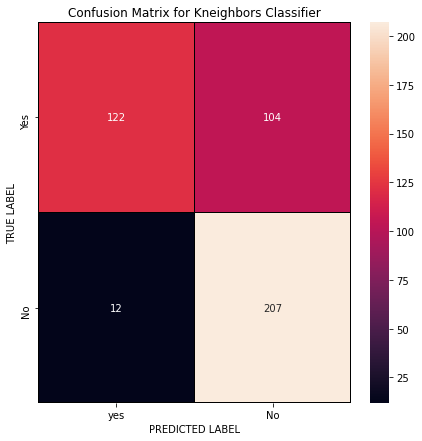

In [198]:
cm = confusion_matrix(y_test,predknc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Kneighbors Classifier')


In [ ]:
True Positive-122,True Negative-207,False Positive-104,False Negative-12

# Support Vector Machine Classifier


In [199]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


0.8629213483146068
[[201  25]
 [ 36 183]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       226
           1       0.88      0.84      0.86       219

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine Classifier')

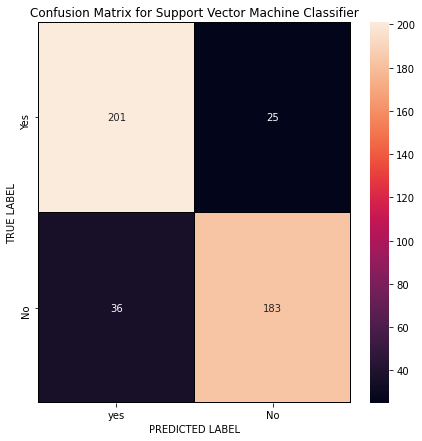

In [200]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')


True Positive-201,True Negative-183,False Positive-25,False Negative-36

# DecisionTreeClassifier

In [201]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8134831460674158
[[187  39]
 [ 44 175]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       226
           1       0.82      0.80      0.81       219

    accuracy                           0.81       445
   macro avg       0.81      0.81      0.81       445
weighted avg       0.81      0.81      0.81       445



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

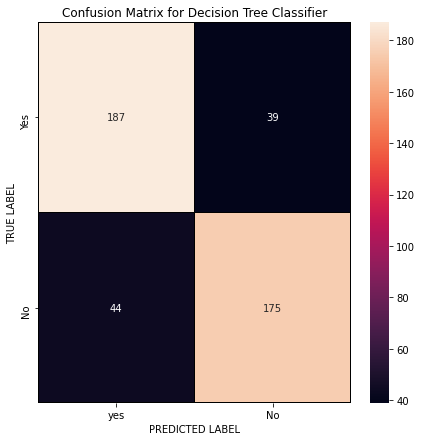

In [202]:
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')


 True Positive-187,True Negative-175,False Positive-39,False Negative-44

# AdaBoostClassifier

In [203]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))


0.8651685393258427
[[201  25]
 [ 35 184]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       226
           1       0.88      0.84      0.86       219

    accuracy                           0.87       445
   macro avg       0.87      0.86      0.86       445
weighted avg       0.87      0.87      0.87       445



Text(0.5, 1.0, 'Confusion Matrix for Ada Boost Classifier')

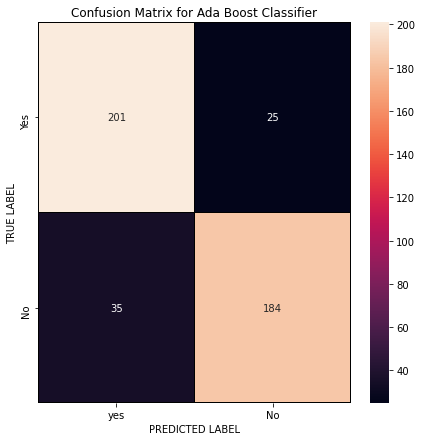

In [204]:
cm = confusion_matrix(y_test,predadb)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Ada Boost Classifier')


 True Positive-201,True Negative-184,False Positive-25,False Negative-35

# RandomForestClassifier

In [227]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))


0.8966292134831461
[[208  18]
 [ 28 191]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       226
           1       0.91      0.87      0.89       219

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.90      0.90      0.90       445



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Classifier')

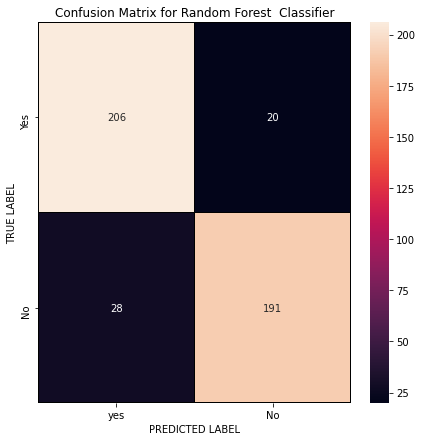

In [206]:
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest  Classifier')


 True Positive-206,True Negative-191,False Positive-20,False Negative-28

# LogisticRegression

In [207]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))


0.8224719101123595
[[188  38]
 [ 41 178]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       226
           1       0.82      0.81      0.82       219

    accuracy                           0.82       445
   macro avg       0.82      0.82      0.82       445
weighted avg       0.82      0.82      0.82       445



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

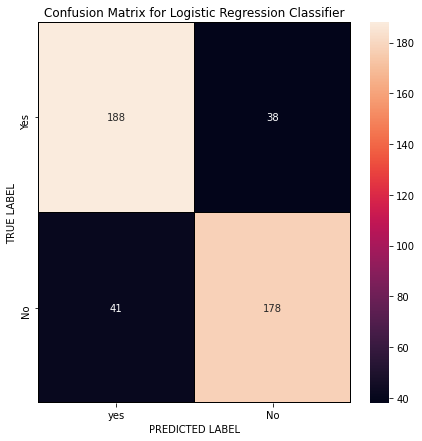

In [208]:
cm = confusion_matrix(y_test,predlgr)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')


 True Positive-188,True Negative-178,False Positive-38,False Negative-41

# Cross Validation

In [209]:
from sklearn.model_selection import ShuffleSplit


In [217]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(lgr, x_scaler, y, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())


Cross Validation of LogisticRegression model  0.7940074906367042


In [218]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(knc, x_scaler, y, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.7208988764044945


In [219]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(dtc, x_scaler, y, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())


Cross Validation of DecisionTree Classifier model  0.7851685393258427


In [220]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(svc, x_scaler, y, cv=cv)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())


Cross Validation of Support Vector Machine Classifier model  0.8337078651685393


In [221]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(rfc, x_scaler, y, cv=cv)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())


Cross Validation of Random Forest Classifier model  0.8647191011235955


In [222]:
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(adb, x_scaler, y, cv=cv)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())


Cross Validation of Ada Boost Classifier model  0.8458426966292134


Cross validation score  is highest for Random Forest, and almost same as model accuracy,So will do hyper parameter tuning for Random Forest.

# HyperParameter Tuning

In [224]:
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,random_state = maxRS,test_size = 0.30)
rfc = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


    
gridsearch=GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}

In [225]:
## Providing Best parameter to model:-
rf = RandomForestClassifier(criterion='entropy',n_estimators=100,max_features='auto',max_depth=9)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = accuracy_score(y_test,predrf)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))


Accuracy Score : 88.53932584269663
[[204  22]
 [ 29 190]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       226
           1       0.90      0.87      0.88       219

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



**After hyperparameter tuning,model is giving approximately same result as with default parameters.

# Plotting roc_auc_curve


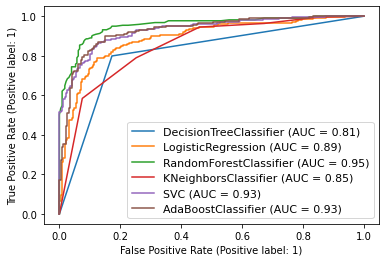

In [228]:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


AUC for our model Random Forest is 95%.

# Saving the Model:-

In [229]:
import pickle
filename ='AutoInsurance_Fraud_prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [230]:
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_concluded = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_concluded


Original  Predicted
0           0          0
1           1          1
2           0          0
3           1          1
4           1          1
..        ...        ...
440         1          1
441         0          1
442         0          0
443         0          1
444         1          0

[445 rows x 2 columns]